# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [52]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from numpy.linalg import norm

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [53]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
## write code here for the Distance function here # 
    k=Cluster_Centroids.shape[0]
    num_examples, num_features= Data_points.shape

    Cluster_Distance= np.zeros((num_examples,k))
    
    for i in range(k):
        Cluster_Distance[:,i]=(((Data_points-Cluster_Centroids[i])**2).sum(axis=1))**0.5

    #if(Distance_Type=="euclidean"):
            #for i,point in enumerate(Data_points):
            #d = np.sqrt(np.sum((point-Cluster_Centroids)**2,axis=1))  
            #Cluster_Distance[d].append(i)
            
    #else:
     #   Cluster_Distance = np.corrcoef(Cluster_Centroids, Data_points)
    return Cluster_Distance 


In [54]:
X=np.random.random((20,2))
centers= X[np.random.choice(20,3,replace=False)]
GUC_Distance(centers, X, "euclidean")

array([[0.54987986, 0.94240074, 0.94233635],
       [0.71630947, 0.35231388, 0.0619048 ],
       [0.83518217, 0.52516752, 0.23527953],
       [0.80942222, 0.35968999, 0.13286481],
       [0.46294105, 0.67632135, 0.62612739],
       [0.61489747, 0.73780058, 0.62045779],
       [0.68680345, 0.29290204, 0.        ],
       [0.53964497, 0.06496366, 0.22988137],
       [0.97082219, 1.02619079, 0.8305274 ],
       [0.        , 0.52651032, 0.68680345],
       [0.481923  , 0.9298729 , 0.96958368],
       [0.56508598, 0.47516775, 0.32445902],
       [0.9013108 , 0.7177378 , 0.45130473],
       [0.44386816, 0.84560885, 0.86498558],
       [0.37099749, 0.8649214 , 0.9496061 ],
       [0.75133476, 0.95198718, 0.83839013],
       [0.79278231, 0.63144739, 0.38538991],
       [0.42542636, 0.49031864, 0.43403828],
       [0.52651032, 0.        , 0.29290204],
       [0.18575339, 0.34095333, 0.51831131]])

> ### 1.2. Code for K means function 

In [55]:
def computeCentroidMean(Data_points, idx, K):
    m, n = Data_points.shape
    centroids = np.zeros((K, n))
    
    for i in np.arange(K):
        centroids[i] = np.mean(Data_points[idx == i], axis = 0)
    
    return centroids

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [77]:
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):
       # write code for intial cluster heads here 
        m, n = Data_points.shape
        K=Number_of_Clusters
        centroids = np.zeros((K, m))
        #randidx = np.random.permutation(Data_points.shape[0])
        #centroids = Data_points[randidx[:K], :]
        closest=np.zeros(m).astype(int)
       # write your your loop 
        iterations=5
        
        while True:
            old_closest=closest.copy()
            Cluster_Distance= GUC_Distance(centers, Data_points, Distance_Type)
            
            if(Distance_Type=='euclidean'):
                closest= np.argmin(Cluster_Distance, axis=1)
                #min_distance_indices=Cluster_Distance.index(min(Cluster_Distance))
            else:
                closest= np.argmax(Cluster_Distance , axis=1)
                #min_distance_indices=Cluster_Distance.index(max(Cluster_Distance))
            for i in range(K):
                centers[i,:]=Data_points[closest==i].mean(axis=0)
                Cluster_Metric=np.sum(np.square(Data_points-centers[i]))
            
           # Means=computeCentroidMean(Data_points,min_distance_indices, Number_of_Clusters)
            if (Cluster_Metric<100):
                Final_Cluster_Distance=Cluster_Distance
                break
                
        
    
        return [ Final_Cluster_Distance , Cluster_Metric ]    

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [57]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [15]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    fig,ax=plt.subplots(figsize=(10,10))
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

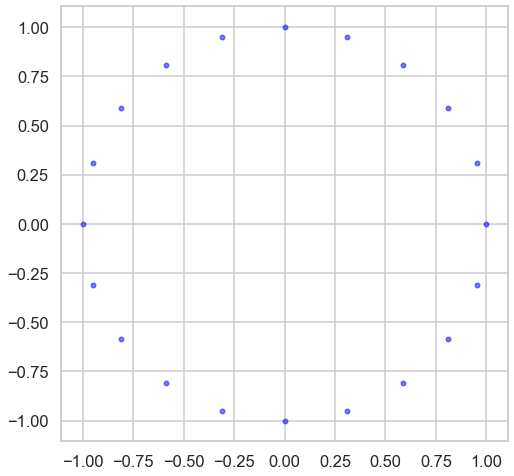

In [5]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)

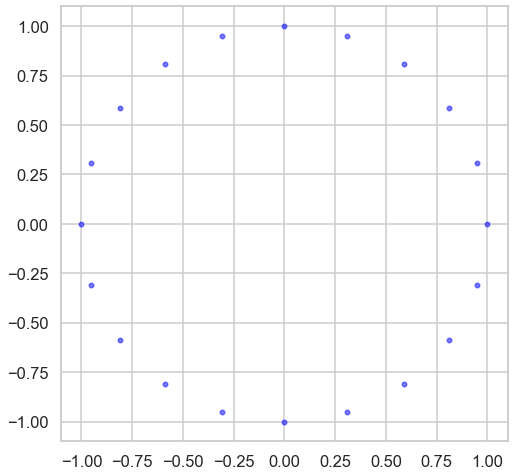

In [16]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

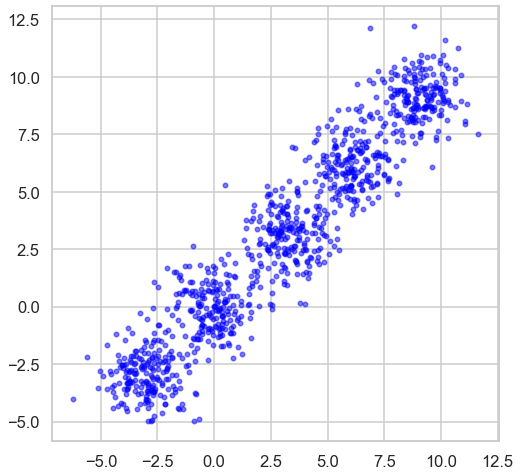

In [6]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

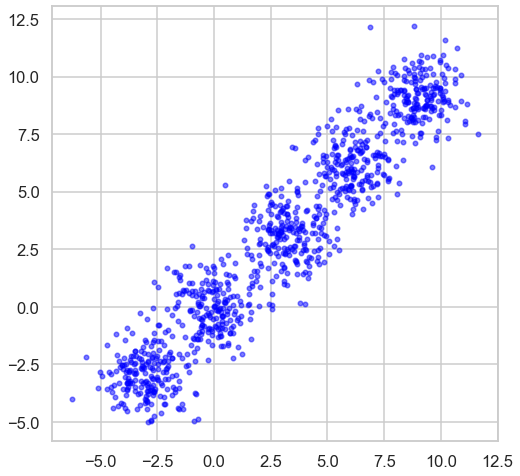

In [17]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

#### 2.3. Example 3 : moons Data Gen and display 

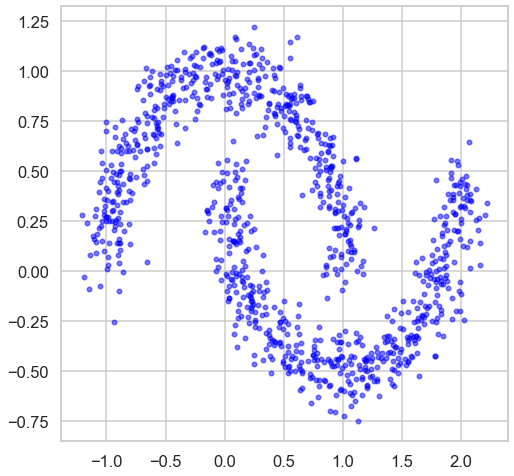

In [18]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)

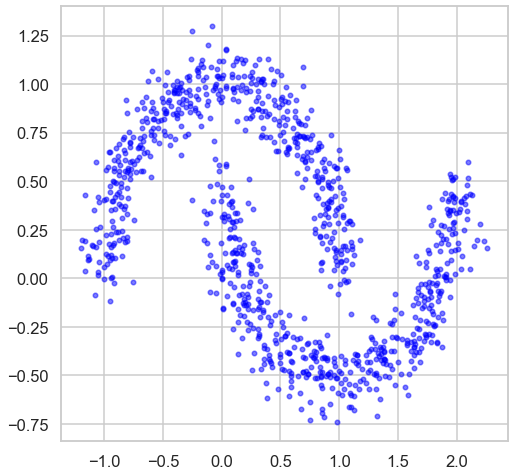

In [18]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [19]:
T = [[11, 12, 5, 2], [15, 6,10], [10, 8, 12, 5], [12,15,8,6]]


In [78]:
#Example 1
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 

# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
[x,y]=GUC_Kmean(X,3,'euclidean')
#display_cluster(X,km=[],3)


In [79]:
print(x)
print(y)

[[0.20560056 0.89276185 0.75631478]
 [0.73430712 0.1974576  0.36901565]
 [0.77077883 0.36768898 0.26584941]
 [0.87078759 0.24456293 0.49787289]
 [0.14669066 0.59588869 0.44948222]
 [0.29236746 0.62731939 0.33784704]
 [0.73912798 0.14283547 0.42169224]
 [0.71675681 0.0949683  0.59425797]
 [0.61720267 0.88795046 0.4168497 ]
 [0.40905588 0.56811671 0.78571326]
 [0.24393812 0.9020591  0.83580199]
 [0.45346685 0.34295636 0.2266544 ]
 [0.71996895 0.55871683 0.12462671]
 [0.13060412 0.80528093 0.7214926 ]
 [0.29754477 0.86264307 0.88406032]
 [0.35399296 0.84638446 0.51100963]
 [0.62559517 0.47539887 0.04628036]
 [0.30698183 0.40007225 0.36378105]
 [0.7408967  0.15989889 0.6565121 ]
 [0.48288695 0.39059948 0.69244215]]
6.038665552358994


In [80]:
# I did not know what to change in the display function

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [ ]:
data=pd.read_csv('Customer data.csv')
[x,y]=GUC_Kmean(data,5,'euclidean')